# Plots

In [1]:

import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from Atlas and Load

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    'PED00423e001'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/'

analysis = EnsembleAnalysis(ens_codes, data_dir)
#analysis.download_from_database(database='atlas')
analysis.generate_trajectories()

Trajectory already exists for ensemble PED00423e001. Loading trajectory.


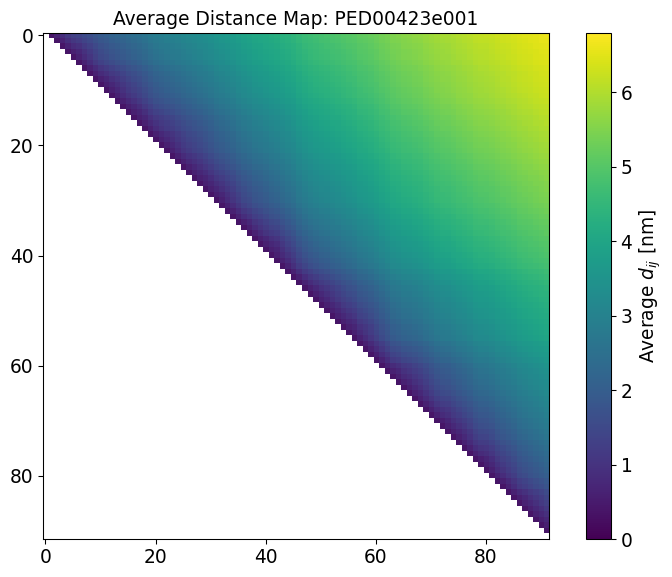

In [3]:
analysis.plot_average_dmap_comparison()

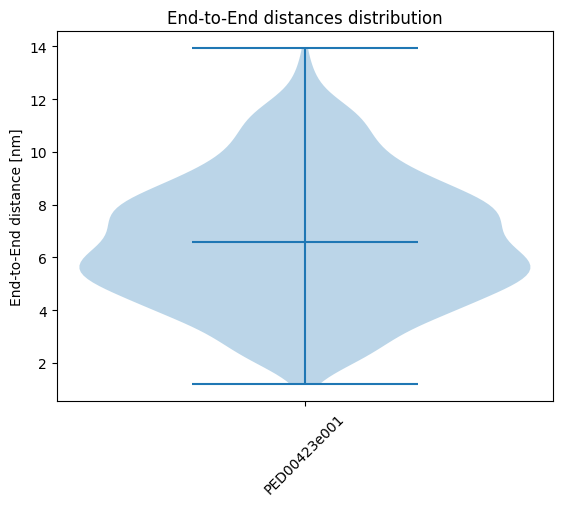

In [4]:
analysis.end_to_end_distances_plot(bins=50, violin_plot=True, median=False, means=True)

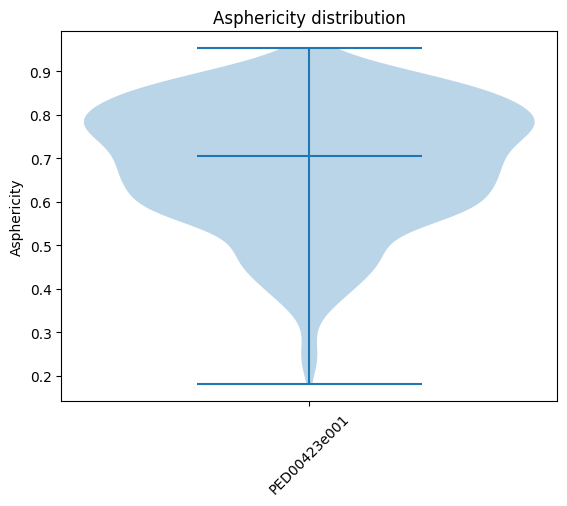

In [5]:
analysis.plot_asphericity_dist(bins=10, violin_plot=True)

Pearson coeff for PED00423e001 = 0.767


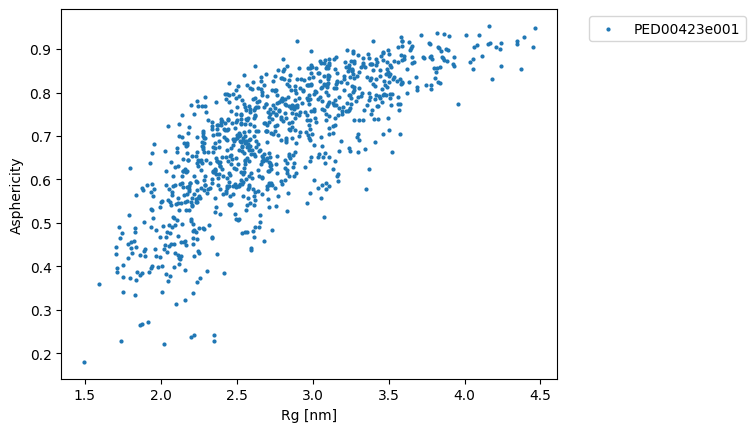

In [6]:
analysis.plot_rg_vs_asphericity()

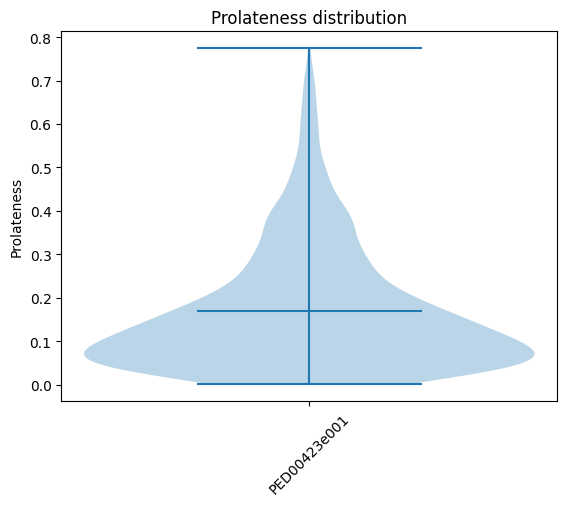

In [7]:
analysis.plot_prolateness_dist(bins=10, violin_plot=True)

Pearson coeff for PED00423e001 = -0.403


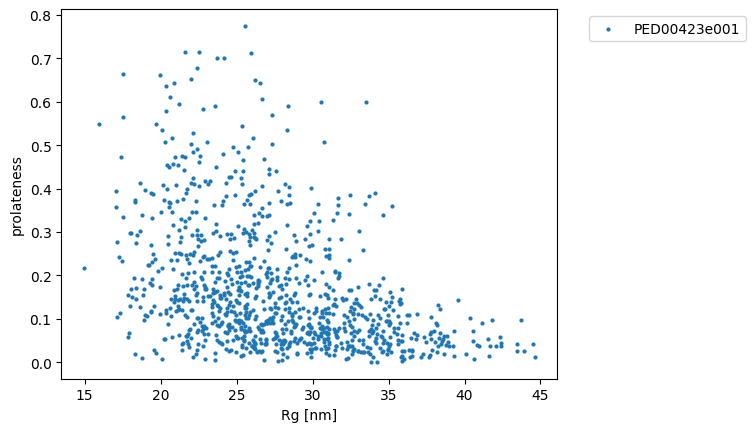

In [8]:
analysis.plot_rg_vs_prolateness()

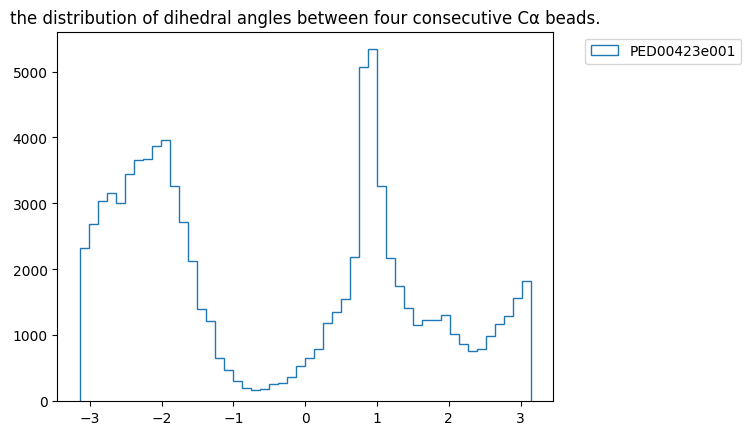

In [9]:
analysis.plot_alpha_angles_dist()

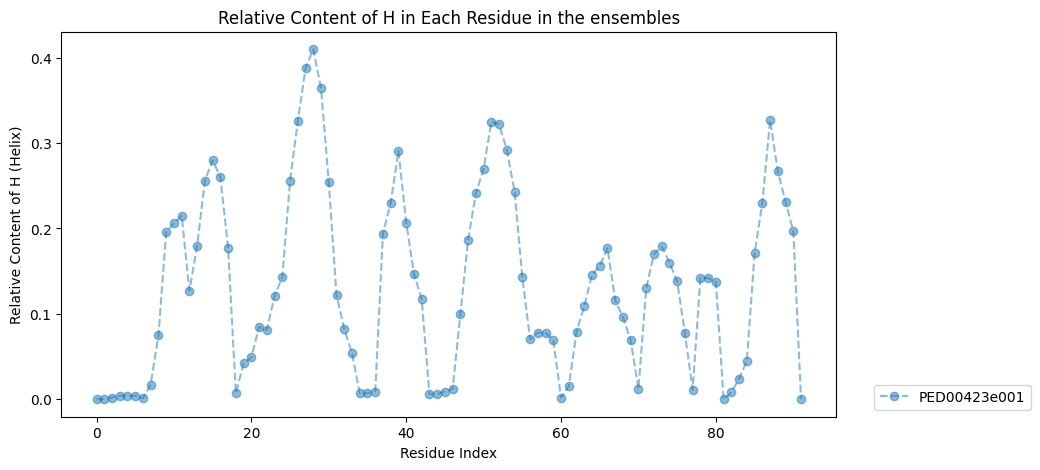

In [10]:
analysis.plot_relative_helix_content()

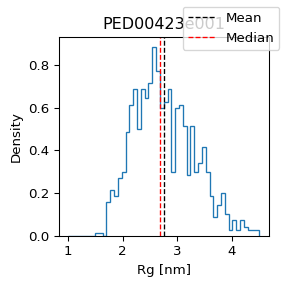

In [11]:
analysis.trajectories_plot_rg_comparison()

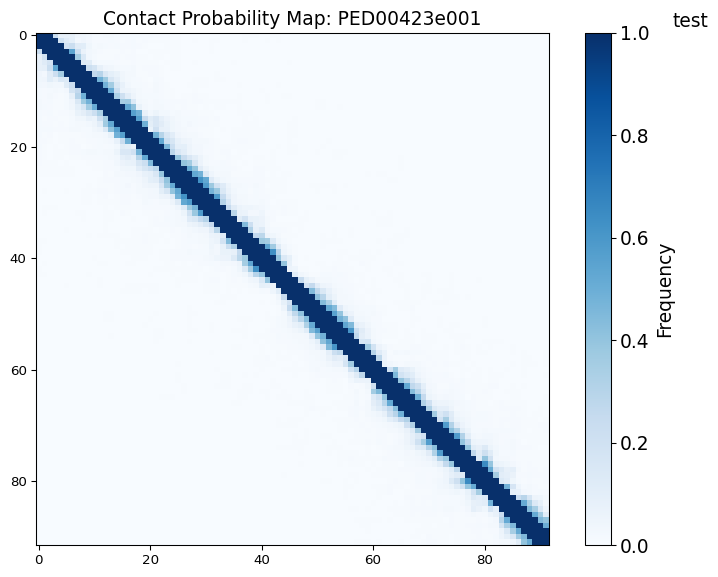

In [12]:
analysis.plot_contact_prob(title="test", threshold=0.8)

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI', 'ASN56-PHI', 'ALA57-PHI', 'PRO58-PHI', 'LEU59-PHI', 'LEU60-PHI', 'ALA61-PHI', 'PRO62-PHI', 'PRO63-PHI', 'ASN64-PHI', 'SER65-PHI', 'ASN66-PHI', 'MET67-PHI', 'GLY68-PHI', 'MET69-PHI', 'THR70-PHI

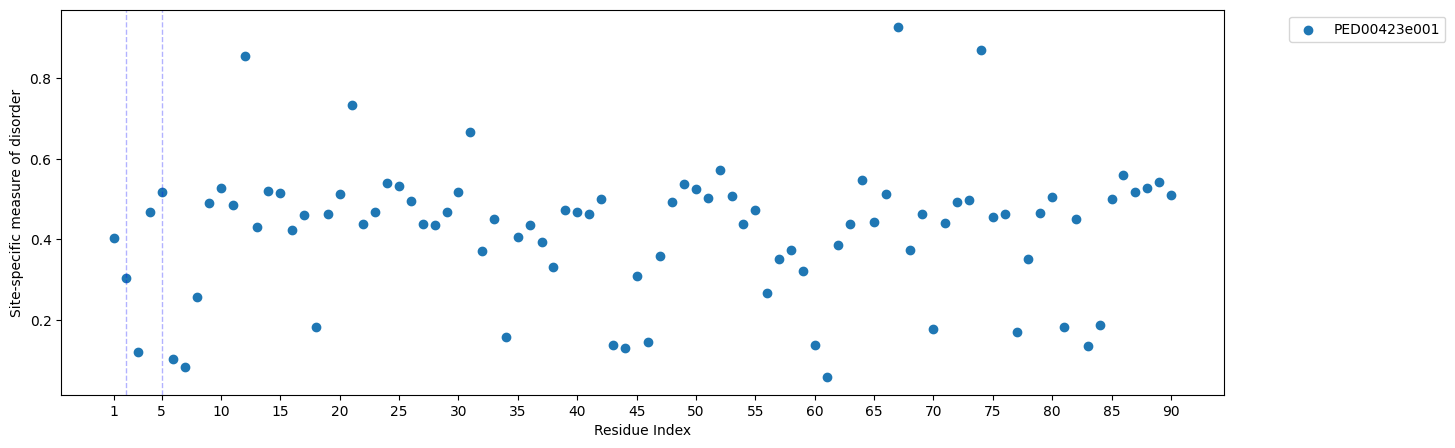

In [13]:
analysis.plot_ss_measure_disorder(pointer=[2,5])

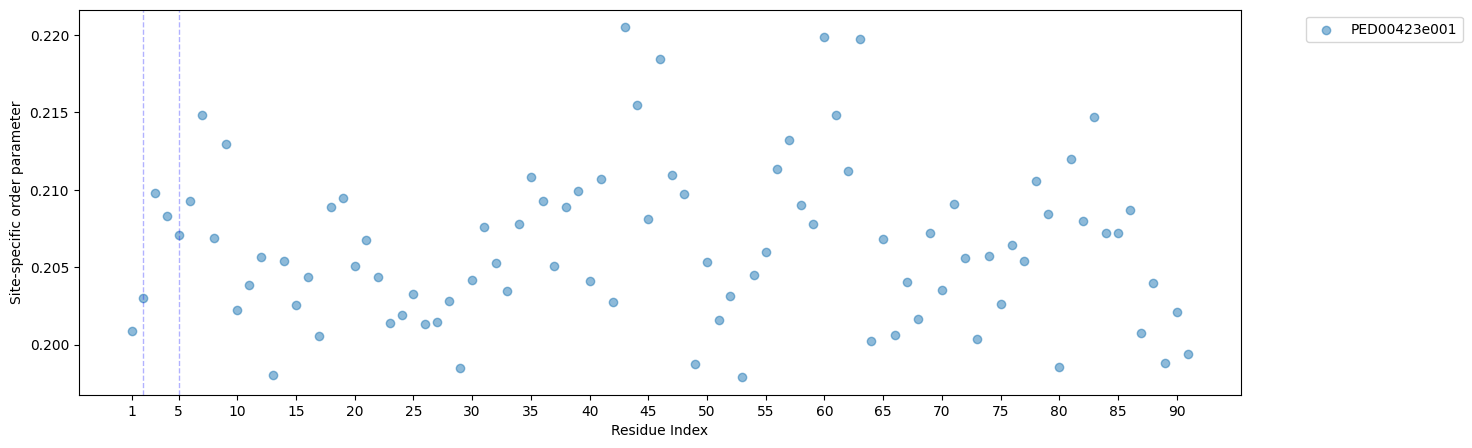

In [14]:
analysis.plot_ss_order_parameter(pointer=[5,2])